In [100]:
import requests
import json
import pandas as pd
%matplotlib inline
from masterscrap import masterscrap

In [101]:
conseil_dict = {
    "Ignazio Cassis" : 2664,
    "Doris Leuthard" : 2510,
    "Ueli Maurer" : 2310,
    "Johann Schneider-Ammann" : 2530,
    "Christoph Blocher" : 2017,
    "Guy Parmelin" : 2621,
    "Didier Burkhalter" : 2589,
}
nb_pages = 10

In [102]:
df = masterscrap(conseil_dict , nb_pages)

http://ws-old.parlament.ch/votes/councillors/2589
1
http://ws-old.parlament.ch/votes/councillors/2589
2
http://ws-old.parlament.ch/votes/councillors/2589
3
http://ws-old.parlament.ch/votes/councillors/2589
4
http://ws-old.parlament.ch/votes/councillors/2589
5
http://ws-old.parlament.ch/votes/councillors/2589
6
http://ws-old.parlament.ch/votes/councillors/2589
7
http://ws-old.parlament.ch/votes/councillors/2589
8
http://ws-old.parlament.ch/votes/councillors/2589
9
http://ws-old.parlament.ch/votes/councillors/2589
10
[[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]]
http://ws-old.parlament.ch/votes/councillors/2664
1
http://ws-old.parlament.ch/votes/councillors/2664
2
http://ws-old.parlament.ch/votes/councillors/2664
3
http://ws-old.parlament.ch/votes/councillors/2664
4
http://ws-old.parlament.ch/votes/councillors/2664
5
http://ws-old.parlament.ch/votes/councillors/2664
6
ht

In [135]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [228]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def draw_graph(graph, df):
    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()
    G.position = {}

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    
    # draw graph
    pos = graphviz_layout(G,prog='neato')
    color_map = []
    ids = df.columns.values
    for node in G:
        if node in ids:
            color_map.append('blue')
            name = list(conseil_dict.keys())[list(conseil_dict.values()).index(node)]
            plt.annotate(name, pos[node])
        else: 
            color_map.append('green')  
    nx.draw(G, pos, node_color=color_map)

    # show graph
    plt.show()

In [229]:
# draw example
edges = []
for c in df:
    votes = df[c]
    edges += [(c, id_) for id_ in df.index.tolist() if votes.loc[id_] == 'Yes']

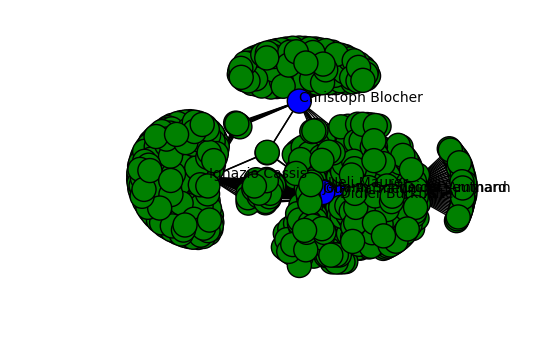

In [230]:
# draw example
draw_graph(edges, df)

In [239]:
def draw_sub_graph(graph, df):
    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()
    G.position = {}

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])            
    
    # draw graph
    pos = graphviz_layout(G,prog='neato')
    #pos = nx.spring_layout(G, scale = 5, k=0.2,iterations=20)
    
    color_map = []; node_size = []
    ids = df.columns.values
            
    for node in nodes:
        if len(G.neighbors(node)) < 2:
            G.remove_node(node)

    for node in G:
        if node in ids:
            node_size.append(1000)
            color_map.append('blue')
            name = list(conseil_dict.keys())[list(conseil_dict.values()).index(node)]
            plt.annotate(name, pos[node])
        else: 
            node_size.append(100)
            color_map.append('green') 
            
    nx.draw(G, pos, node_color=color_map, node_size=node_size)

    # show graph
    plt.show()

In [240]:
draw_sub_graph(edges,df)

TypeError: graphviz_layout() got an unexpected keyword argument 'k'

In [107]:
from sklearn.decomposition import NMF

In [108]:
to_replace = ['Yes', 'No', 'P', 'EH', 'ES', 'NT']
replace_by = range(1,len(to_replace)+1)
clean_df = df.replace(to_replace, replace_by)
clean_df = clean_df.fillna(0)
clean_df

,2589,2664,2621,2530,2510,2017,2310
1492,2.0,0.0,2.0,2.0,1.0,0.0,2.0
1503,2.0,0.0,4.0,6.0,2.0,0.0,6.0
1504,2.0,0.0,2.0,6.0,2.0,0.0,2.0
1505,1.0,0.0,2.0,6.0,1.0,0.0,2.0
1506,2.0,0.0,2.0,6.0,1.0,0.0,2.0
1507,2.0,0.0,4.0,6.0,2.0,0.0,4.0
1508,2.0,0.0,2.0,6.0,1.0,0.0,2.0
1509,1.0,0.0,2.0,6.0,1.0,0.0,2.0
1510,2.0,0.0,2.0,6.0,1.0,0.0,2.0
1511,2.0,0.0,2.0,6.0,1.0,0.0,2.0


In [109]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [110]:
H.shape

(2, 7)

In [111]:
W.shape

(1242, 2)

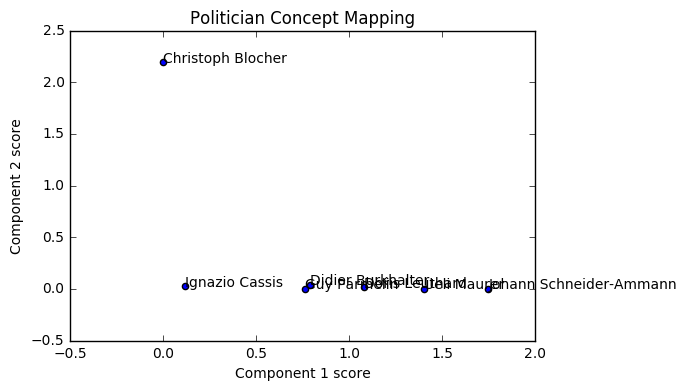

In [112]:
plt.title("Politician Concept Mapping")
x = H[0,:]
y = H[1,:]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(conseil_dict):
    plt.annotate(c, (H[0,:][i], H[1,:][i]))
plt.show()

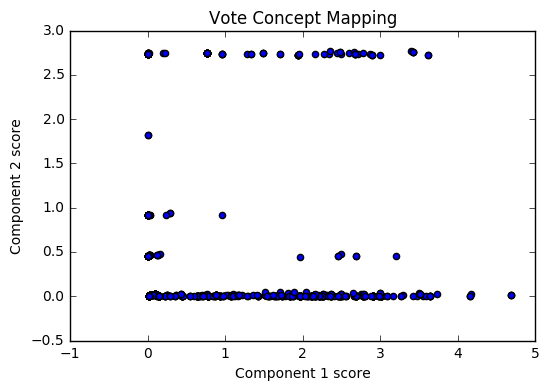

In [113]:
plt.title("Vote Concept Mapping")
x = W[:,0]
y = W[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
plt.show()

In [114]:
model = NMF(n_components=7, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [115]:
from sklearn.metrics import mean_squared_error

nR = np.dot(W,H)
mean_squared_error(clean_df.values.flatten(), list(nR.flatten()))

9.1306139818953436e-06

In [116]:
from sklearn.manifold import TSNE

In [117]:
W_embedded = TSNE(n_components=2).fit_transform(W)
H_embedded = TSNE(n_components=2).fit_transform(H)

In [118]:
H_embedded.shape, W_embedded.shape

((7, 2), (1242, 2))

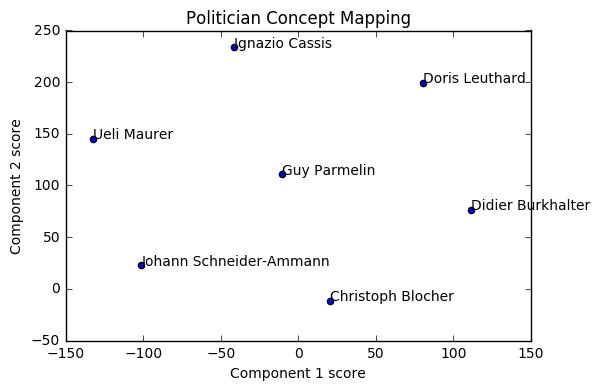

In [119]:
plt.title("Politician Concept Mapping")
x = H_embedded[:,0]
y = H_embedded[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(conseil_dict):
    plt.annotate(c, (H_embedded[:,0][i], H_embedded[:,1][i]))
plt.show()

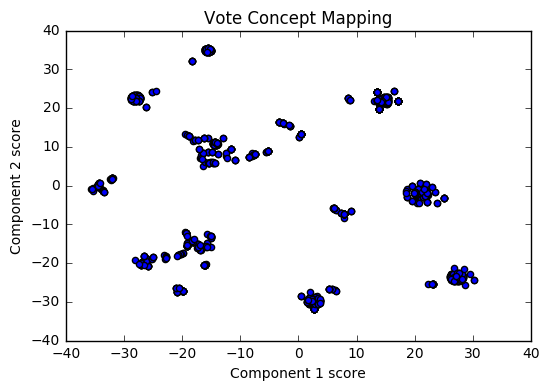

In [120]:
plt.title("Vote Concept Mapping")
x = W_embedded[:,0]
y = W_embedded[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
plt.show()

In [121]:
#SVD
import numpy as np
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(clean_df - np.mean(clean_df), k = min(clean_df.shape)-1)

In [122]:
U.shape, Vt.shape

((1242, 6), (6, 7))

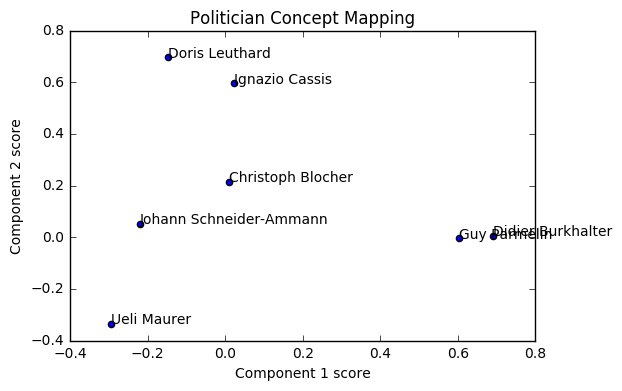

In [123]:
plt.title("Politician Concept Mapping")
x = Vt[0,:]
y = Vt[1,:]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(conseil_dict):
    plt.annotate(c, (Vt[0,:][i], Vt[1,:][i]))
plt.show()

In [246]:
import numpy
numpy.__version__

'1.13.3'